In [1]:
from principal_DBN_alpha import *
from principal_RBM_alpha import *
from utils import *
from tqdm import tqdm, notebook
import matplotlib.pyplot as plt

# Etude sur Binary AlphaDigit

In [2]:
data = lire_alpha_digit(caracs, path_data=path_data)

## RBM 

On entraine un RBM sur les données de Binary AlphaDigit puis on genere des images à partir de ce qu'il a appris.

In [3]:
neurons = 200
epochs = 200
nb_pixels = 20*16
learning_rate = 0.1
gibbs_steps = 200

### RBM par charactère

On entraine un RBM pour chaque caractère.

In [15]:
list_rbm_caracs = []
for carac in notebook.tqdm(list(caracs.keys()), desc="Characters", unit="char", leave=False):
    data = lire_alpha_digit([carac], path_data)
    nb_pixels = data.shape[1]
    rbm = RBM(p = nb_pixels, q = neurons)
    rbm.train_RBM(x=data, epochs=epochs, lr=learning_rate, show_progress=True)
    list_rbm_caracs.append(rbm)

Characters:   0%|          | 0/36 [00:00<?, ?char/s]

Training RBM: 100%|██████████| 200/200 [00:02<00:00, 84.93epoch/s, reconstruction_error=0.27]


On genere des images des caractères en utilisant la méthode de Gibbs Sampling.

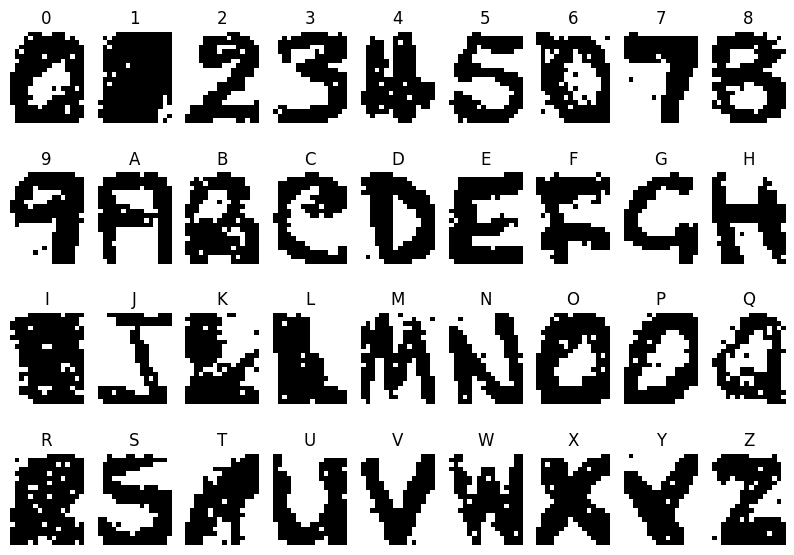

<Figure size 640x480 with 0 Axes>

In [16]:
fig, axs = plt.subplots(4, 9, figsize=(10, 7), sharex=True, sharey=True)
axs = axs.flatten()

for i, rbm in enumerate(list_rbm_caracs):
    img = rbm.generer_image_RBM(gibbs_steps, 1)  # 1 image with 100 Gibbs steps
    
    img_reshaped = img[0].cpu().reshape(20, 16)
    
    axs[i].imshow(img_reshaped, cmap='Greys')
    axs[i].set_title(list(caracs.keys())[i])
    axs[i].axis('off')

# Adjust layout to prevent overlap
# plt.tight_layout()
plt.show()
plt.suptitle(f'RBM with {neurons} neurons and {epochs} epochs')
# Adjust layout to prevent overlap 
plt.tight_layout()


### Plusieurs caractères par RBM

In [55]:
neurons = 250
epochs = 200
nb_pixels = 20*16
learning_rate = 0.1
gibbs_steps = 200

Training RBM:   0%|          | 0/200 [00:00<?, ?epoch/s]

Training RBM: 100%|██████████| 200/200 [00:01<00:00, 120.48epoch/s, reconstruction_error=14.65]


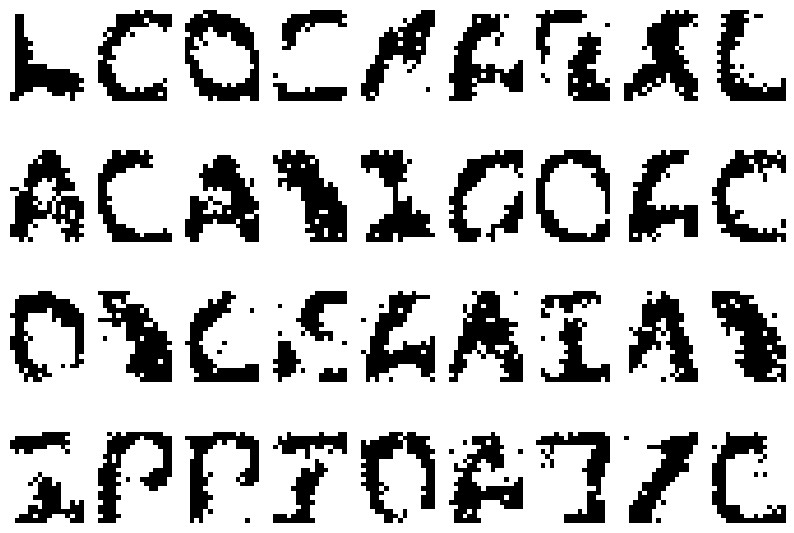

In [56]:
caracteres = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]
# caracteres = ["]
data = lire_alpha_digit(caracteres, path_data)

nb_pixels = data.shape[1]
rbm = RBM(p = nb_pixels, q = neurons)
rbm.train_RBM(x=data, epochs=epochs, lr=learning_rate, show_progress=True)
    
    

nb_images = 36

fig, axs = plt.subplots(nb_images//9, 9, figsize=(10, 7), sharex=True, sharey=True)
axs = axs.flatten()


# Generate 4 images for each character
for i in range(nb_images):
    img = rbm.generer_image_RBM(gibbs_steps, 1)  # 1 image with 100 Gibbs steps
    
    img_reshaped = img[0].cpu().reshape(20, 16)
    
    axs[i].imshow(img_reshaped, cmap='Greys')
    # axs[i].set_title("A")
    axs[i].axis('off')
fig.savefig(f"figs/RBM_all_{epochs}epochs_{neurons}neurons.png")

### Tester differents parametres

In [ ]:
list_neurons = [50,100,200]
list_epochs = [100,200,300]

for neurons in notebook.tqdm(list_neurons, desc="Neurons list", unit="Neurons", leave=False):
    for epochs in notebook.tqdm(list_epochs, desc="Epochs list", unit="epochs", leave=False):
        list_rbm_caracs = []
        for carac in notebook.tqdm(list(caracs.keys()), desc="Characters", unit="char", leave=False):
            data = lire_alpha_digit([carac], path_data)
            nb_pixels = data.shape[1]
            rbm = RBM(p = nb_pixels, q = neurons)
            rbm.train_RBM(x=data, epochs=epochs, lr=learning_rate, show_progress=False)
            list_rbm_caracs.append(rbm)

        fig, axs = plt.subplots(4, 9, figsize=(10, 7), sharex=True, sharey=True)
        axs = axs.flatten()

        for i, rbm in enumerate(list_rbm_caracs):
            img = rbm.generer_image_RBM(gibbs_steps, 1)  # 1 image with 100 Gibbs steps

            img_reshaped = img[0].cpu().reshape(20, 16)

            axs[i].imshow(img_reshaped, cmap='Greys')
            axs[i].set_title(list(caracs.keys())[i])
            axs[i].axis('off')
        
        # add figure title 
        plt.suptitle(f'RBM with {neurons} neurons and {epochs} epochs')
        # Adjust layout to prevent overlap 
        plt.tight_layout()
        # save the figure
        plt.savefig(f'res/RBM-{neurons}neurons-{epochs}epochs.png')


## DBN

In [ ]:
liste_dbn_caracs = []
for carac in notebook.tqdm(list(caracs.keys()), desc="Characters", unit="char", leave=True):
            data = lire_alpha_digit([carac], path_data)     
            nb_pixels = data.shape[1]
            # les couches du dbn (de chaque rbm en soit)
            layers = [nb_pixels, neurons, neurons, neurons]

            dbn = DBN(layers=layers)
            dbn.train_DBN(x=data, epochs=[epochs], lr=learning_rate, plot=False, show_progress=True)
            liste_dbn_caracs.append(dbn)

In [ ]:
fig, axs = plt.subplots(4, 9, figsize=(10, 7), sharex=True, sharey=True)
axs = axs.flatten()

for i, dbn in enumerate(liste_dbn_caracs):
    img = dbn.generer_image_DBN(gibbs_steps, 1)  # 1 image with 100 Gibbs steps
    
    img_reshaped = img[0].cpu().reshape(20, 16)
    
    axs[i].imshow(img_reshaped, cmap='Greys')
    axs[i].set_title(list(caracs.keys())[i])
    axs[i].axis('off')

# Adjust layout to prevent overlap
# plt.tight_layout()
plt.show()

Tester le DBN pour differents parametres

In [ ]:
nb_layers = [2,3,4]
list_neurons = [50,100,200]
list_epochs = [100,200,300]

for nb_layers in notebook.tqdm(nb_layers, desc="Layers list", unit="Layers", leave=False):
    for neurons in notebook.tqdm(list_neurons, desc="Neurons list", unit="Neurons", leave=False):
        for epochs in notebook.tqdm(list_epochs, desc="Epochs list", unit="epochs", leave=False):
            liste_dbn_caracs = []
            for carac in notebook.tqdm(list(caracs.keys()), desc="Characters", unit="char", leave=False):
                data = lire_alpha_digit([carac], path_data)     
                nb_pixels = data.shape[1]
                # les couches du dbn (de chaque rbm en soit)
                layers = [nb_pixels] + [neurons]*nb_layers

                dbn = DBN(layers=layers)
                dbn.train_DBN(x=data, epochs=[epochs], lr=learning_rate, plot=False, show_progress=False)
                liste_dbn_caracs.append(dbn)

            fig, axs = plt.subplots(4, 9, figsize=(10, 7), sharex=True, sharey=True)
            axs = axs.flatten()

            for i, dbn in enumerate(liste_dbn_caracs):
                img = dbn.generer_image_DBN(gibbs_steps, 1)  # 1 image with 100 Gibbs steps

                img_reshaped = img[0].cpu().reshape(20, 16)

                axs[i].imshow(img_reshaped, cmap='Greys')
                axs[i].set_title(list(caracs.keys())[i])
                axs[i].axis('off')

            # add figure title 
            plt.suptitle(f'DBN with {nb_layers} layers, {neurons} neurons and {epochs} epochs')
            # Adjust layout to prevent overlap 
            plt.tight_layout()
            # save the figure
            plt.savefig(f'res/DBN-{nb_layers}layers-{neurons}neurons-{epochs}epochs.png')

# Étude sur MNIST

## Chargement des données MNIST et processing

In [1]:
from principal_DNN_MNIST import *

In [3]:
import torchvision.datasets
import torchvision.transforms as transforms
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")

transform = transforms.ToTensor()
# if not exist, download mnist dataset
train_set = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_set = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
# take only 300 samples so the model can overfit to see if it works
# train_set.data = train_set.data[:300]
# train_set.targets = train_set.targets[:300]
train_set.data = (train_set.data > 127).float()
test_set.data = (test_set.data > 127).float()
# Applatir les images (28*28) en vecteurs (784)
train_mnist = train_set.data.view(train_set.data.shape[0], -1).float().to(device)
test_mnist = test_set.data.view(test_set.data.shape[0], -1).float().to(device) 



In [4]:
# One Hot Encoding des labels
labels_train_mnist = torch.nn.functional.one_hot(train_set.targets).float().to(device)
labels_test_mnist = torch.nn.functional.one_hot(test_set.targets).float().to(device)


train_mnist.shape, labels_train_mnist.shape, test_mnist.shape, labels_test_mnist.shape


(torch.Size([60000, 784]),
 torch.Size([60000, 10]),
 torch.Size([10000, 784]),
 torch.Size([10000, 10]))

## Test du DNN sur MNIST

In [5]:

nb_pixels = train_mnist.shape[1]
neurons = 500
epochs = 500
learning_rate = 0.17
nb_layers = 3
layers_dbn = [nb_pixels] + [neurons]*(nb_layers-1)
nb_classes = len(train_set.class_to_idx)
batch_size = 300

### DNN pre-entrainement

In [ ]:
dnn_pretrain = DNN(layers_dbn, nb_classes=nb_classes)
dnn_pretrain.pretrain_DNN(x=train_mnist, epochs=300, batch_size=batch_size,lr=learning_rate, show_progress=True)

Training DBN:  67%|██████▋   | 2/3 [01:50<00:53, 53.86s/RBM]

### Backpropagation sur 2 DNN

Non pré-entrainé

In [ ]:
dnn_non_pretrain = DNN(layers_dbn, nb_classes=nb_classes)
dnn_non_pretrain.retropropagation(X=train_mnist, Y=labels_train_mnist, epochs=epochs, lr=learning_rate, batch_size=batch_size, show_progress=True)

Pre-entrainé 

In [7]:
dnn_pretrain.retropropagation(X=train_mnist, Y=labels_train_mnist, epochs=epochs, lr=learning_rate,batch_size=batch_size, show_progress=True)

Training DNN:  10%|█         | 52/500 [00:30<04:22,  1.71epoch/s, Loss=0.199] 


KeyboardInterrupt: 

### Test des deux DNN

In [ ]:
dnn_pretrain.test_DNN(test_mnist, labels_test_mnist)

In [ ]:
dnn_non_pretrain.test_DNN(test_mnist, labels_test_mnist)

### Figures

In [8]:
nb_pixels = train_mnist.shape[1]
neurons = 200
epochs = 200
learning_rate = 0.09
nb_layers = 2
layers_dbn = [nb_pixels] + [neurons]*(nb_layers-1)
nb_classes = len(train_set.class_to_idx)
batch_size = 300

### Variation du nombre de couches

Layers list:   0%|          | 0/5 [00:00<?, ?Layers/s]

Training DNN: 100%|██████████| 200/200 [03:09<00:00,  1.05epoch/s, Loss=nan]


Error of DNN with 1 layers without pretraining: 0.05590000003576279


Training DNN: 100%|██████████| 200/200 [03:11<00:00,  1.04epoch/s, Loss=nan]


Error of DNN with 2 layers without pretraining: 0.07720000296831131


Training DNN: 100%|██████████| 200/200 [03:22<00:00,  1.01s/epoch, Loss=nan]


Error of DNN with 3 layers without pretraining: 0.8989999890327454


Training DNN: 100%|██████████| 200/200 [03:47<00:00,  1.14s/epoch, Loss=nan]


Error of DNN with 4 layers without pretraining: 0.8971999883651733


Training DNN: 100%|██████████| 200/200 [04:01<00:00,  1.21s/epoch, Loss=nan]


Error of DNN with 5 layers without pretraining: 0.8967999815940857
[]
[tensor(0.0559), tensor(0.0772), tensor(0.8990), tensor(0.8972), tensor(0.8968)]


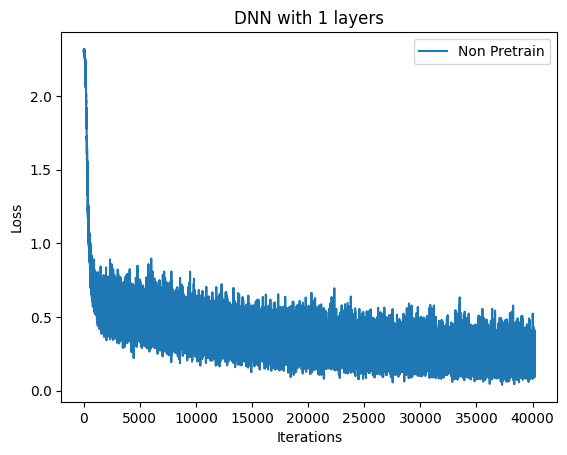

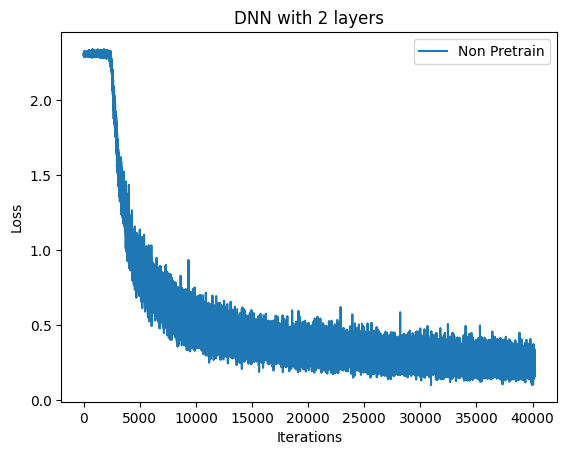

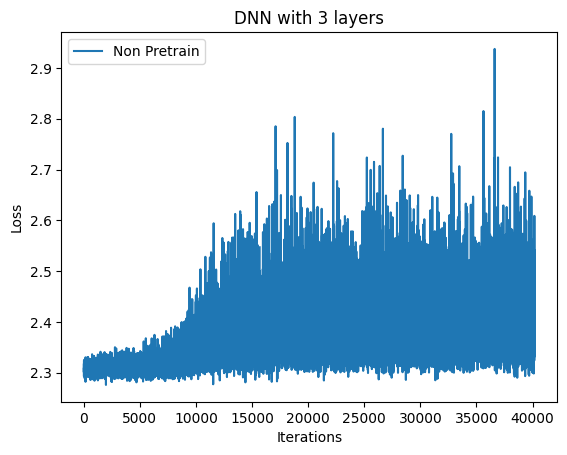

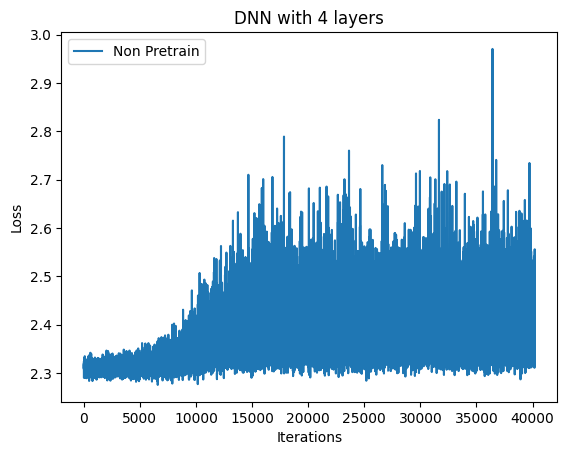

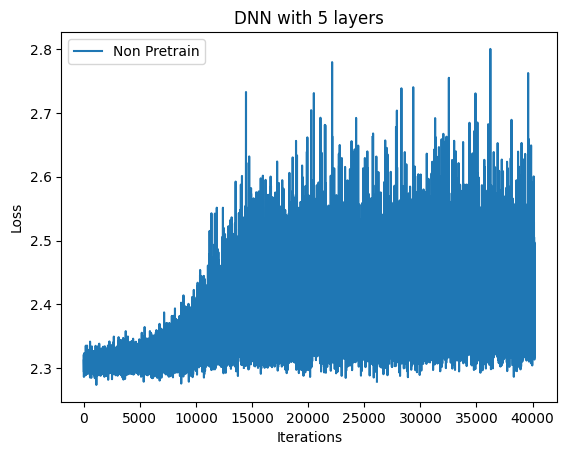

In [9]:
errors_pretrain = []
errors_non_pretrain = []
for nb_layers in notebook.tqdm([1,2,3,4,5], desc="Layers list", unit="Layers", leave=False):
    layers_dbn = [nb_pixels] + [neurons]*(nb_layers)
    # dnn_pretrain = DNN(layers_dbn, nb_classes=nb_classes)
    dnn_non_pretrain = DNN(layers_dbn, nb_classes=nb_classes)
    # dnn_pretrain.pretrain_DNN(x=train_mnist, epochs=epochs, lr=learning_rate, show_progress=True)

    loss_non_pretrain = dnn_non_pretrain.retropropagation(X=train_mnist, Y=labels_train_mnist, epochs=epochs, lr=learning_rate, batch_size=batch_size, show_progress=True)
    # loss_pretrain = dnn_pretrain.retropropagation(X=train_mnist, Y=labels_train_mnist, epochs=epochs, lr=learning_rate,batch_size=batch_size, show_progress=True)
    # error_pretrain,_ = dnn_pretrain.test_DNN(test_mnist, labels_test_mnist)
    error_non_pretrain,_ = dnn_non_pretrain.test_DNN(test_mnist, labels_test_mnist)
    # errors_pretrain.append(error_pretrain)
    errors_non_pretrain.append(error_non_pretrain)
    # plot losses for each model
    figure = plt.figure()
    # plt.plot(loss_pretrain, label='Pretrain')
    plt.plot(loss_non_pretrain, label='Non Pretrain')
    plt.title(f'DNN with {nb_layers} layers')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(f'res/DNN-{nb_layers}layers.png')
    # torch.save(dnn_pretrain, f'res/dnn_pretrain_{nb_layers}layers.pth')
    torch.save(dnn_non_pretrain, f'res/dnn_non_pretrain_{nb_layers}layers.pth')
    # print(f"Error of DNN with {nb_layers} layers with pretraining: {error_pretrain}")
    print(f"Error of DNN with {nb_layers} layers without pretraining: {error_non_pretrain}")
    
print(errors_pretrain)
print(errors_non_pretrain)

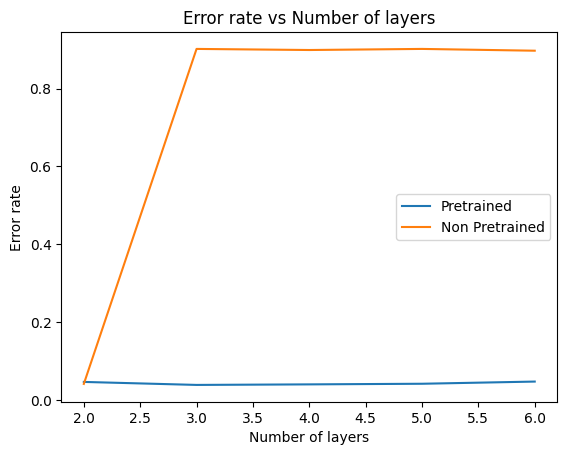

In [7]:
# plot errors   
plt.plot([2,3,4,5,6], errors_pretrain, label='Pretrained')
plt.plot([2,3,4,5,6], errors_non_pretrain, label='Non Pretrained')
plt.xlabel('Number of layers')
plt.ylabel('Error rate')
plt.title('Error rate vs Number of layers')
plt.legend()
plt.savefig('res/errors.png')
plt.show()


### Variation du nombre de neurones

In [ ]:
nb_pixels = train_mnist.shape[1]
neurons = 200
epochs = 200
learning_rate = 0.2
nb_layers = 2
layers_dbn = [nb_pixels] + [neurons]*(nb_layers-1)
nb_classes = len(train_set.class_to_idx)
batch_size = 300

Layers list:   0%|          | 0/7 [00:00<?, ?Layers/s]

Training DNN:   0%|          | 0/200 [00:02<?, ?epoch/s, Loss=nan]


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


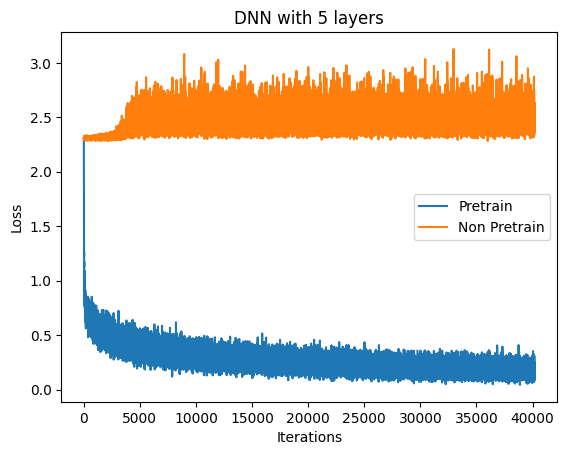

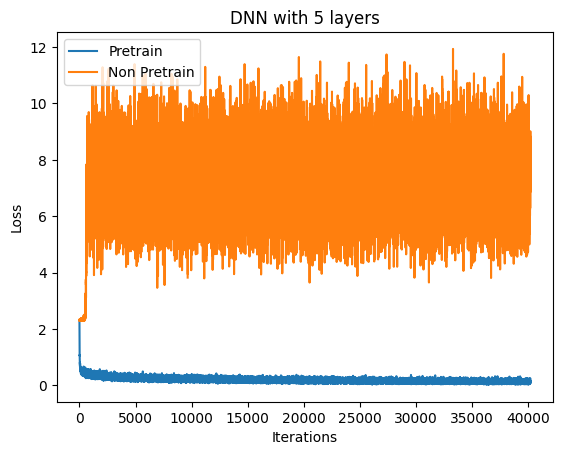

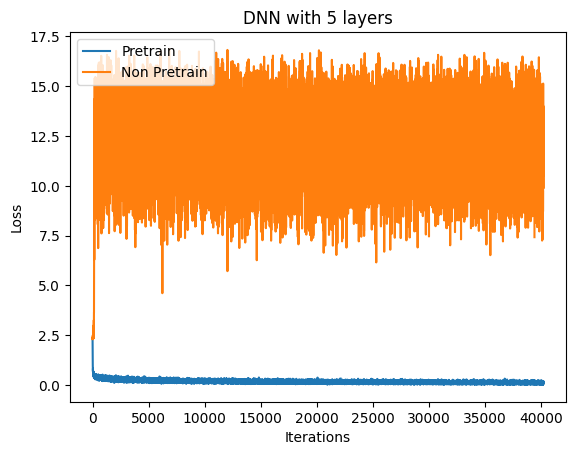

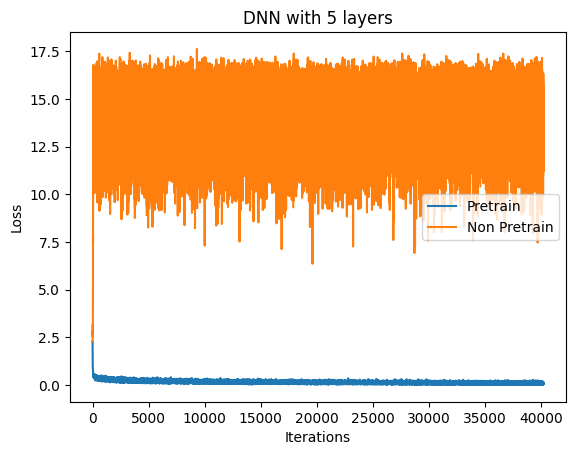

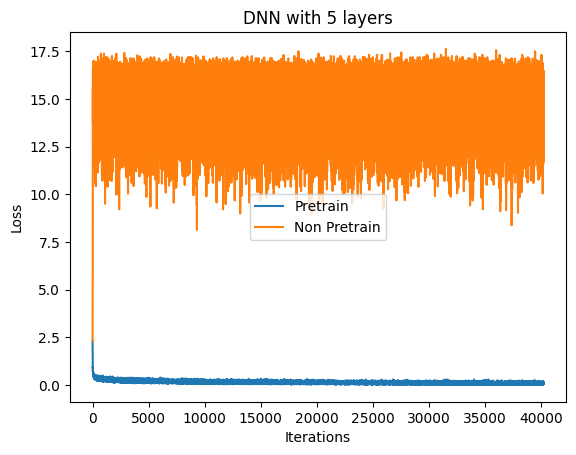

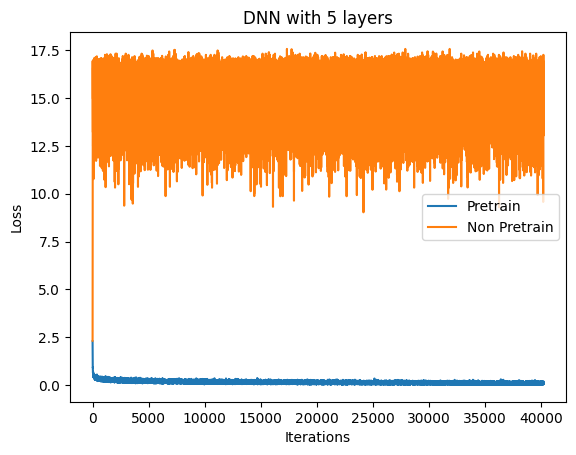

In [8]:
errors_pretrain = []
errors_non_pretrain = []
for neurons in notebook.tqdm(range(100,701,100), desc="Layers list", unit="Layers", leave=False):
    layers_dbn = [nb_pixels] + [neurons]*(nb_layers-1)
    dnn_pretrain = DNN(layers_dbn, nb_classes=nb_classes)
    dnn_non_pretrain = DNN(layers_dbn, nb_classes=nb_classes)
    dnn_pretrain.pretrain_DNN(x=train_mnist, epochs=epochs, lr=learning_rate, show_progress=False)

    loss_non_pretrain = dnn_non_pretrain.retropropagation(X=train_mnist, Y=labels_train_mnist, epochs=epochs, lr=learning_rate, batch_size=batch_size, show_progress=True)
    loss_pretrain = dnn_pretrain.retropropagation(X=train_mnist, Y=labels_train_mnist, epochs=epochs, lr=learning_rate,batch_size=batch_size, show_progress=True)
    error_pretrain,_ = dnn_pretrain.test_DNN(test_mnist, labels_test_mnist)
    error_non_pretrain,_ = dnn_non_pretrain.test_DNN(test_mnist, labels_test_mnist)
    errors_pretrain.append(error_pretrain)
    errors_non_pretrain.append(error_non_pretrain)
    # plot losses for each model
    figure = plt.figure()
    plt.plot(loss_pretrain, label='Pretrain')
    plt.plot(loss_non_pretrain, label='Non Pretrain')
    plt.title(f'DNN with {nb_layers} layers')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(f'res/DNN-{nb_layers}layers.png')
    torch.save(dnn_pretrain, f'res/dnn_pretrain_{neurons}neurons.pth')
    torch.save(dnn_non_pretrain, f'res/dnn_non_pretrain_{neurons}neurons.pth')
    
print(errors_pretrain)
print(errors_non_pretrain)

In [10]:
errors_pretrain

[tensor(0.0598),
 tensor(0.0434),
 tensor(0.0389),
 tensor(0.0370),
 tensor(0.0365),
 tensor(0.0374)]

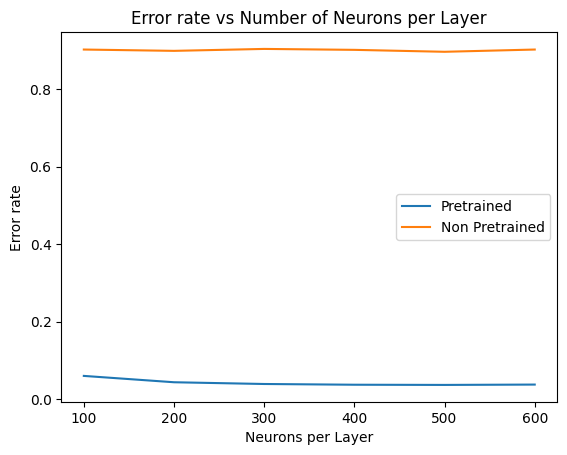

In [13]:
# plot errors   
plt.plot(list(range(100,601,100)), errors_pretrain, label='Pretrained')
plt.plot(list(range(100,601,100)), errors_non_pretrain, label='Non Pretrained')
plt.xlabel('Neurons per Layer')
plt.ylabel('Error rate')
plt.title('Error rate vs Number of Neurons per Layer')
plt.legend()
plt.savefig('res/error_rate_neurons.png')
plt.show()

### Variation des données d'entrainement

In [14]:
nb_pixels = train_mnist.shape[1]
neurons = 200
epochs = 200
learning_rate = 0.2
nb_layers = 2
layers_dbn = [nb_pixels] + [neurons]*(nb_layers-1)
nb_classes = len(train_set.class_to_idx)
batch_size = 300

In [15]:
errors_pretrain = []
errors_non_pretrain = []
for samples in notebook.tqdm([1000, 3000, 7000, 10000, 30000, 6000], desc="Layers list", unit="Layers", leave=False):
    X_train = train_mnist[:samples]
    Y_train = labels_train_mnist[:samples]
    dnn_pretrain = DNN(layers_dbn, nb_classes=nb_classes)
    dnn_non_pretrain = DNN(layers_dbn, nb_classes=nb_classes)
    dnn_pretrain.pretrain_DNN(x=X_train, epochs=epochs, lr=learning_rate, show_progress=False)

    loss_non_pretrain = dnn_non_pretrain.retropropagation(X=train_mnist, Y=labels_train_mnist, epochs=epochs, lr=learning_rate, batch_size=batch_size, show_progress=True)
    loss_pretrain = dnn_pretrain.retropropagation(X=train_mnist, Y=labels_train_mnist, epochs=epochs, lr=learning_rate,batch_size=batch_size, show_progress=True)
    error_pretrain,_ = dnn_pretrain.test_DNN(test_mnist, labels_test_mnist)
    error_non_pretrain,_ = dnn_non_pretrain.test_DNN(test_mnist, labels_test_mnist)
    errors_pretrain.append(error_pretrain)
    errors_non_pretrain.append(error_non_pretrain)
    # plot losses for each model
    plt.plot(loss_pretrain, label='Pretrain')
    plt.plot(loss_non_pretrain, label='Non Pretrain')
    plt.title(f'DNN with {nb_layers} layers')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(f'res/DNN-{nb_layers}layers.png')
    torch.save(dnn_pretrain, f'res/dnn_pretrain_{samples}samples.pth')
    torch.save(dnn_non_pretrain, f'res/dnn_non_pretrain_{samples}samples.pth')
    
print(errors_pretrain)
print(errors_non_pretrain)

Layers list:   0%|          | 0/6 [00:00<?, ?Layers/s]

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
plt.plot([1000, 3000, 7000, 10000, 30000, 60000], errors_pretrain, label='Pretrained')
plt.plot([1000, 3000, 7000, 10000, 30000, 60000], errors_non_pretrain, label='Non Pretrained')
plt.xlabel('Dataset size')
plt.ylabel('Error rate')
plt.title('Error rate vs Dataset size')
plt.legend()
plt.savefig('res/error_rate_dataset_size.png')
plt.show()
